<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0728_CNN_Mnist_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# 이미지 학습 하려고 해요.
# MNIST 예제 일단 이용
# 일단 이미지 파일이 아니라 pixel값을 추출한 csv 파일로부터 데이터를 읽어들여서 사용
# 필요한 모듈 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout # pdf5번 conv layer
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [3]:
# raw data loading
df = pd.read_csv('/content/drive/MyDrive/kcc 3기 colab home/data/mnist/train.csv')
display(df.head(), df.shape) #(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

In [ ]:
# 데이터 전처리
# 결측치 없음
# 이상치 없음

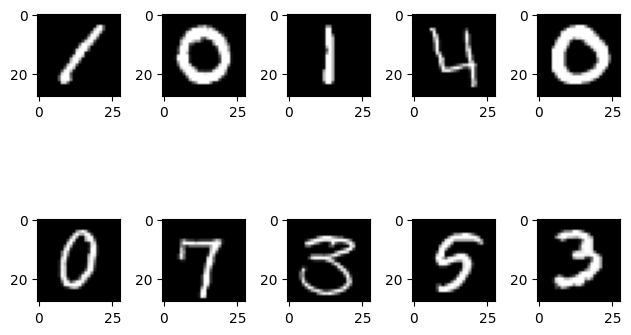

In [7]:
# 이미지 한번 확인하고 가자
img_data =df.drop('label',axis=1, inplace=False).values
#원본을 지우는것 inplace falase 복사본지우기 2차원 values

# figure를 만들자.
fig = plt.figure()
fig_arr = []

for n in range(10):
  fig_arr.append(fig.add_subplot(2, 5, n+1))
  fig_arr[n].imshow(img_data[n].reshape(28,28),
                    cmap='gray')

plt.tight_layout()
plt.show()


In [8]:
# 일단 데이터를 분리
# train, test 분리

x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label',axis=1,inplace=False).values,
                 df['label'].values,
                 test_size=0.3,
                 random_state=0)
# 이제 데이터에 대해서 정규화를 진행하면 되요.

scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# 여기까지 했는데 이상없으면 코드상 문제 없다.

In [16]:
# tensorflow 2.x 모델 구현
model = Sequential()
# model 생성한 layer 세우기 #pdf 11번 그림

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',input_shape=(28,28,1))) # 32개 사용, 사이즈 몇개 (3,3) 대표 relu로 잡기
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu')) # 64개 사용, 사이즈 몇개 (3,3) 대표 relu로 잡기
model.add(MaxPooling2D(pool_size=(2,2))) #conv pool conv pool
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu')) # 64개 사용, 사이즈 몇개 (3,3) 대표 relu로 잡기
# conv pool conv pool 이래야 특징을 찾는다.
# 4차원 여기까지이고, 이미지 거치고 나온 데이터 가지고 밑에 코드로 사용 4차원으로 계산이 불가
# Feature Extraction
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())
# 이제 설정하고 돌리면 결론~


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [27]:
# 모델 설정

# model.compile(optimizer=Adam(learning_rate=1e-3),
#               loss='sparse_categorical_crossentropy', 고침
#               metrics=['accuracy'])

# # 학습
# model_result = model.fit(x_data_train_norm.reshape(-1,28,28,1),
#                          t_data_train,
#                          epochs=200,
#                          batch_size=100,
#                          verbose=1,
#                          validation_split=0.3)
# 학습
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# callback를 설정하면

# 학습
model_result = model.fit(x_data_train_norm.reshape(-1, 28,28,1),
                         t_data_train,
                         epochs=200,
                         batch_size=100,
                         verbose=1,
                         validation_split=0.3)

Epoch 1/200
206/206 [==============================] - 13s 8ms/step - loss: 0.4753 - accuracy: 0.8496 - val_loss: 0.1376 - val_accuracy: 0.9577
Epoch 2/200
206/206 [==============================] - 1s 6ms/step - loss: 0.1282 - accuracy: 0.9585 - val_loss: 0.0756 - val_accuracy: 0.9777
Epoch 3/200
206/206 [==============================] - 1s 6ms/step - loss: 0.0895 - accuracy: 0.9713 - val_loss: 0.0574 - val_accuracy: 0.9831
Epoch 4/200
206/206 [==============================] - 1s 7ms/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.0535 - val_accuracy: 0.9842
Epoch 5/200
206/206 [==============================] - 1s 7ms/step - loss: 0.0576 - accuracy: 0.9813 - val_loss: 0.0502 - val_accuracy: 0.9845
Epoch 6/200
206/206 [==============================] - 1s 7ms/step - loss: 0.0492 - accuracy: 0.9834 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 7/200
206/206 [==============================] - 1s 6ms/step - loss: 0.0449 - accuracy: 0.9854 - val_loss: 0.0466 - val_accuracy: 0.985

In [28]:
# 모델 평가

print (model.evaluate(x_data_test_norm.reshape(-1,28,28,1),t_data_test))



394/394 [==============================] - 1s 3ms/step - loss: 0.1098 - accuracy: 0.9904
[0.10975972563028336, 0.9903967976570129]


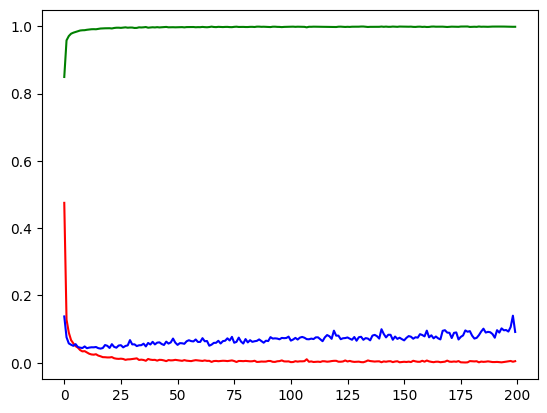

In [29]:
#History 객체를 이용해서 학습이 어떻게 진행되었는지 그래프 확인
plt.plot(model_result.history['loss'], color='r')
plt.plot(model_result.history['val_loss'], color='b')
plt.plot(model_result.history['accuracy'], color='g')
plt.show()